# Capstone Project

The project revolves around the dataset of Combined Cycle Power Plant. The dataset contains 5 columns ( variables ) and 9568 rows ( data points ). We will begin by learning about the variables and their types and eventually will begin regression. 
#### Table of Contents
<ul>
    <li>EDA</li>
    <ul>
        <li>Descriptive Statistics</li>
        <li>Visualizations</li>
        <ul>
            <li>Pair Plots</li>
        </ul>
        <li>Variable Descriptions</li>
        <li>EDA Summary</li>
    </ul>
    <li>Regression</li>
    <ul>
        <li>Predicting PE through AT</li>
        <li>Predicting AT through PE</li>
    </ul>
</ul>
group bar: https://python-graph-gallery.com/11-grouped-barplot/

# EDA

In [1]:
# importing necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr


import warnings
warnings.filterwarnings("ignore")

### Decriptive Statistics

In [2]:
# Importing the Dataset
dataset = pd.read_csv('capstone_data_regression.csv')

In [3]:
'''
AT - Temperature
V  - Exhaust Vacuum
AP - Ambient Pressure
RH - Relative Humidity
PE - Net hourly electrical energy output 
'''
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
'''
.info() helps us know the object types of 
all the variables in the dataset.
Fact: We find that all the variables are floats (float64)
Since, all the variables are floats we can also assume 
that regression would be a good procedure for predictions 
purposes
'''
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.8 KB


In [5]:
'''
.dropna() helps us remove all the Nan (Not a number) values 
that might contaminating the dataset. 
Fact: But we find that there are none like that in 
this dataset
'''
len_before_dropna = len(dataset)
print(len_before_dropna)
dataset.dropna()
len_after_dropna = len(dataset)
print(len_after_dropna)

9568
9568


In [6]:
'''
Should we drop any variables in this dataset ?
No, we need to find which variables can help us with 
regression first 
'''
# No Code 

'\nShould we drop any variables in this dataset ?\nNo, we need to find which variables can help us with \nregression first \n'

In [7]:
'''
.drop_duplicates() helps us remove the duplicates and 
keeps the last instance of their occurence.
Fact: there are no duplicates


'''
len_before_dropna = len(dataset)
print(len_before_dropna)
dataset.drop_duplicates(keep='last')
len_after_dropna = len(dataset)
print(len_after_dropna)

9568
9568


In [8]:
'''
.shape helps knowing the dataset's rows and columns
Fact: 9568 rows and 5 columns
'''
dataset.shape

(9568, 5)

In [9]:
'''
.describe() gives a summary of descriptive facts on each 
variable. It works with numerical data.

Note: We can observe that mean and 50% of the data 
are closely apart
'''
dataset.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [10]:
def getMinMax(dataset):
    '''
    getMinMax() takes in a dataframe type dataset and then
    prints the minimum and maximum values of the numerical values
    '''
    for i in dataset:
        print('Min of', i ,dataset.describe()[i]['min'])
        print('Max of', i ,dataset.describe()[i]['max'])
getMinMax(dataset)

Min of AT 1.81
Max of AT 37.11
Min of V 25.36
Max of V 81.56
Min of AP 992.89
Max of AP 1033.3
Min of RH 25.56
Max of RH 100.16
Min of PE 420.26
Max of PE 495.76


## Visualizations

### Pair Plots

Pair Plots helps us finding out closely a variables if visually correlating with another variable. It usually workes with numerical variables

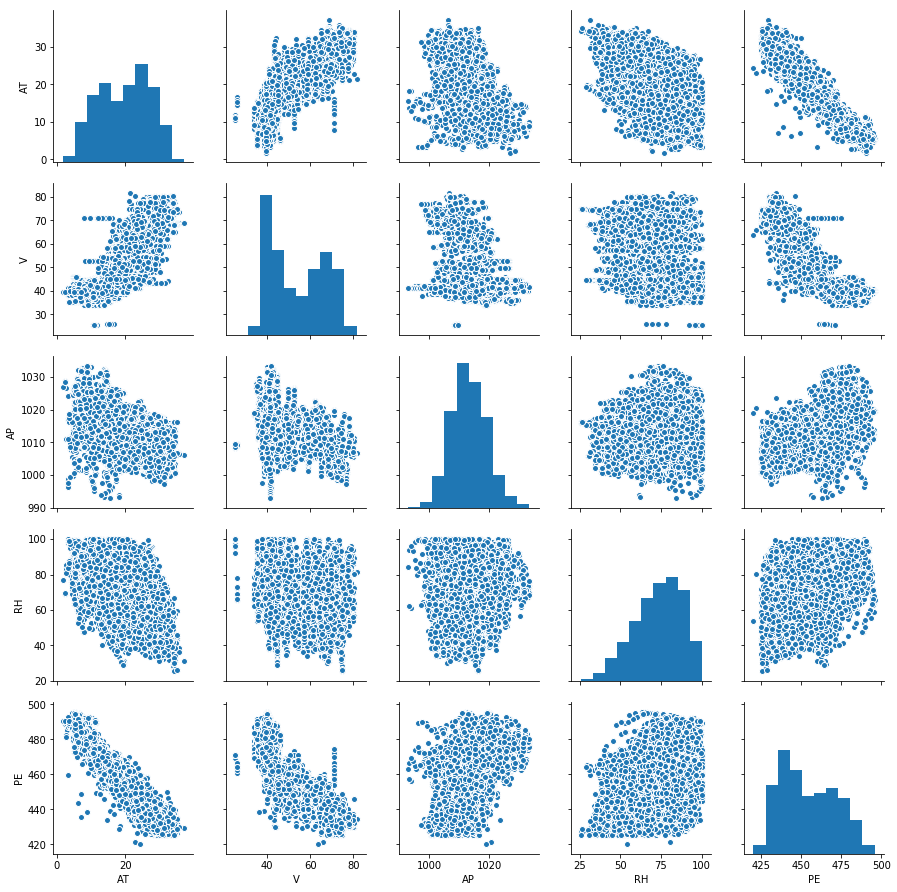

In [11]:
def getPairPlots(dataset):
    '''
    getPairPlots() simply accepts dataframe type dataset and prints the
    pair plots for the numerical in that dataset
    '''
    sns.pairplot(dataset)
    plt.show()
getPairPlots(dataset)



### PDF and Histogram
These help us display distributions of the variables

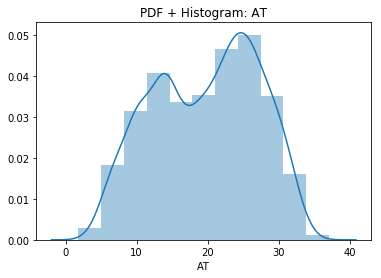

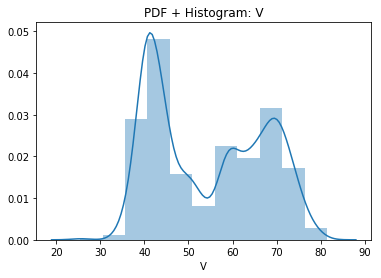

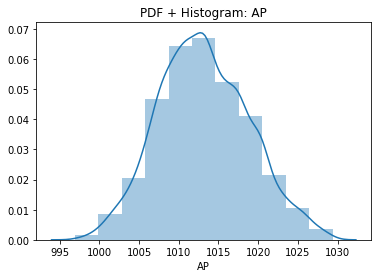

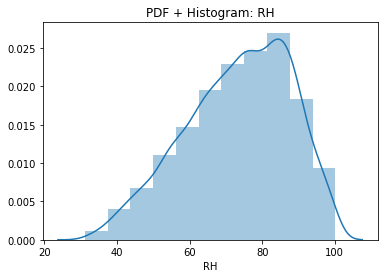

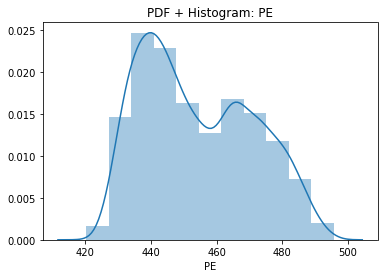

In [18]:
bins = 11
def datasetHist(dataset, bins):
    '''
    sns.displot() is used for creating a Probability 
    density function. It displays over a variable's 
    histogram
    
    Below this function prints the PDFs (probability density function) 
    of all the variables of the dataset
    '''
    for i in dataset:        
        sns.distplot(dataset[i], bins)
        plt.title('PDF + Histogram: {0}'.format(i))
        plt.show()

datasetHist(dataset, bins)

### Boxplot
These help us display the outliers

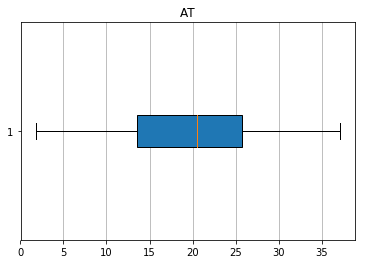

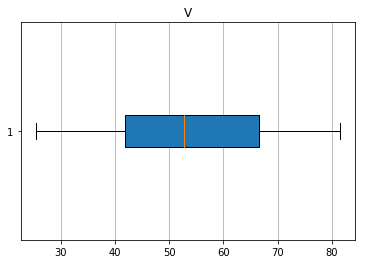

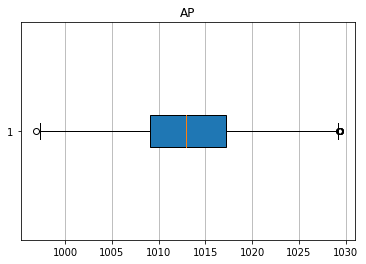

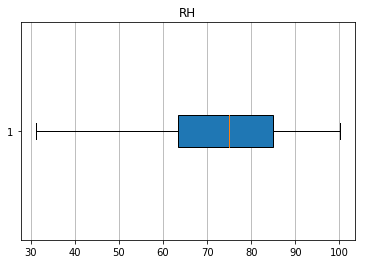

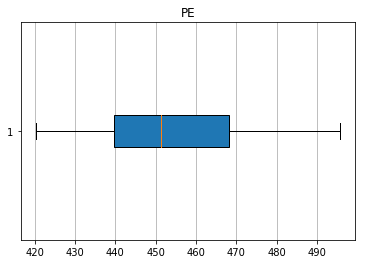

In [19]:
# Outliers Check

def OutlierDetection(dataset):
    '''
    plt.boxplot() helps us create boxplots
    Boxplots are used for the purposes of find where
    a certain variables central tendencies lie.
    With AP amd RH we find that there are some countable
    number of outliers because they are out of the bound of
    boxplot.
    '''
    
    for i in dataset:
        fig, ax = plt.subplots()
        ax.set_title('{0}'.format(i))
        ax.xaxis.grid(True)
        ax.boxplot([dataset[i].values], patch_artist=True,  vert=False)
    plt.show()
        
OutlierDetection(dataset)


In [14]:
def listOfOutlierIndex(dataset):
    '''
    listOfOutlierIndex() takes in the dataframe type dataset. 
    And then we based on its iqr value and the 1.5 outlier rule removes 
    the outliers from the dataset.
    '''
    outlierIndexList = []
    for i in dataset:
        a=dataset.describe()[i]['25%']
        a = a-iqr(dataset[i]*1.5)
        b=dataset.describe()[i]['75%']
        b = b+iqr(dataset[i]*1.5)
        for e in range(len(dataset[i])):
            if(dataset[i][e] < a):
                if e not in outlierIndexList:
                    outlierIndexList.append(e)
            if(dataset[i][e] > b):
                if e not in outlierIndexList:
                    outlierIndexList.append(e)
    return outlierIndexList
a=(listOfOutlierIndex(dataset))
# print(a)


In [15]:
dataset=dataset.drop(dataset.index[a])

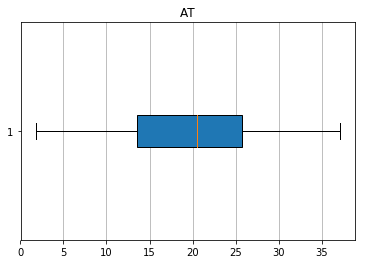

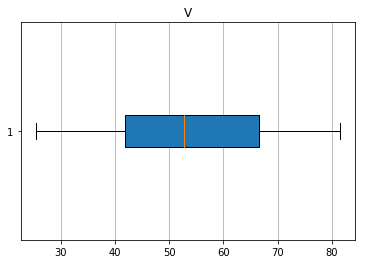

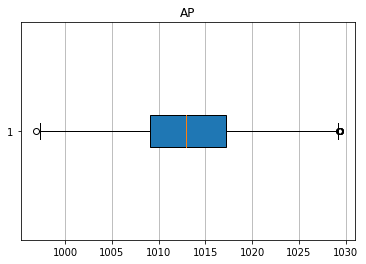

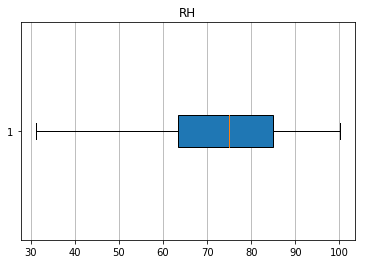

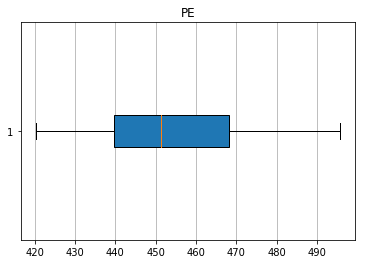

In [16]:
OutlierDetection(dataset)

In [20]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Variable Descriptions

In [34]:
# Getting singular variables
t = dataset['AT'].values
v = dataset['V'].values
ap = dataset['AP'].values
rh = dataset['RH'].values
pe = dataset['PE'].values

### Variable 1: Temperature
```Python
array([14.96, 25.18,  5.11, ..., 31.32, 24.48, 21.6 ])
```
The variable 'temperature' is a continous variable with a list of floats.

```Python
np.min(dataset[0].values), np.max(dataset[0].values)
```
Temperature ranges from 1.81 C to 37.11 C


We would like to find how can temperature affect the rest of the dataset therefore we will be taking measuring the correlation between temperature and the rest of the variables. 

In [22]:
# Calculating correlation Coefficients between variables
coef_t_v = np.corrcoef(t, v)[0][1]
coef_t_ap = np.corrcoef(t, ap)[0][1]
coef_t_rh = np.corrcoef(t, rh)[0][1]
coef_t_pe = np.corrcoef(t, pe)[0][1]
print('coef_t_v :', coef_t_v)
print('coef_t_ap :', coef_t_ap)
print('coef_t_rh :', coef_t_rh)
print('coef_t_pe :', coef_t_pe)

coef_t_v : 0.842853650775012
coef_t_ap : -0.5091086930607499
coef_t_rh : -0.5425325915083017
coef_t_pe : -0.9475413960047304


By Calculating the coefficients we see the temperature affects all the other variables. But it affects Exhaust Vaccuum and the Electrical Output the highest. From the Correlation calculations we can also conclude that it has inverse relationship with electrical output but a positive one with vaccuum. Furthermore, ambient pressure and relative humidity do have a relation but not as correlated as the other 2. 

Lets look at the effect it has on V, PE, AP, RH

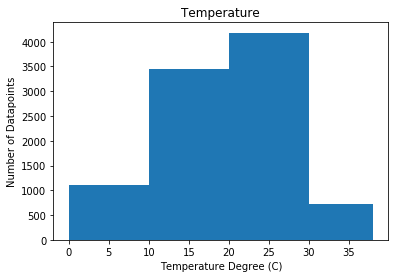

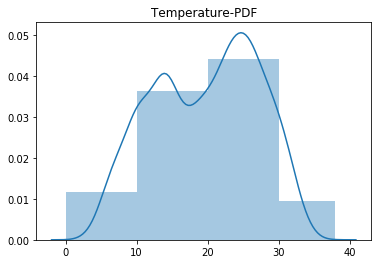

In [24]:
plt.hist(t, bins=[0, 10, 20, 30, 38])
plt.ylabel('Number of Datapoints')
plt.xlabel('Temperature Degree (C)')
plt.title('Temperature')
plt.show()
sns.distplot(t, [0, 10, 20, 30, 38])
plt.title('Temperature-PDF')
plt.show()



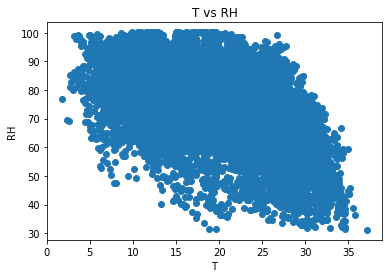

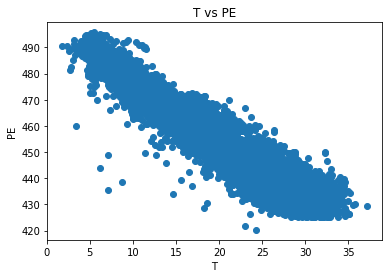

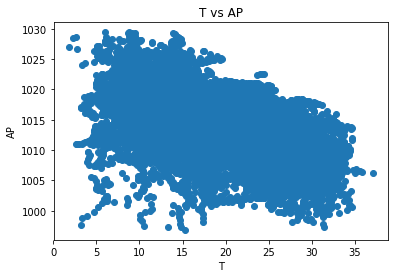

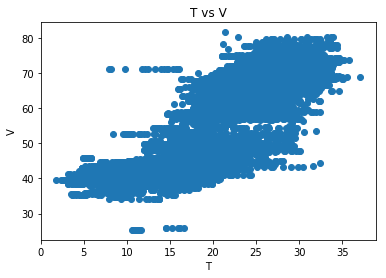

In [26]:
plt.scatter(t, rh)
plt.title('T vs RH')
plt.xlabel('T')
plt.ylabel('RH')
plt.show()

plt.scatter(t, pe)
plt.title('T vs PE')
plt.xlabel('T')
plt.ylabel('PE')
plt.show()

plt.scatter(t, ap)
plt.title('T vs AP')
plt.xlabel('T')
plt.ylabel('AP')
plt.show()

plt.scatter(t, v)
plt.title('T vs V')
plt.xlabel('T')
plt.ylabel('V')
plt.show()



### Summary
From the above analysis we can infer couple of conclusions:- 
1. T variables correlates very well with PE as well as V but doesn't affect AP and RH as much
2. When it comes to predicting PE or V, T can play a big role supplying information for regression.

### Variable 2: Exhaust Vacuum
```Python
array([41.76, 62.96, 39.4 , ..., 74.33, 69.45, 62.52])
```
The variable 'Exhaust Vacuum' is a continous variable with a list of floats.

```Python
np.min(dataset[1].values), np.max(dataset[1].values)
```
Exhaust Vacuum ranges from 25.36 Hg to 81.56 Hg

Note: In the previous Variable analysis we found out that the Exhaust Vacuum has a good correlation with temperature
therefore, in order to explore more we will begin by correlating Exhaust Vacuum with PE, AP, and RH

In [27]:
coef_v_ap = np.corrcoef(v, ap)[0][1]
coef_v_rh = np.corrcoef(v, rh)[0][1]
coef_v_pe = np.corrcoef(v, pe)[0][1]

print('coef_v_ap :', coef_v_ap)
print('coef_v_rh :', coef_v_rh)
print('coef_v_pe :', coef_v_pe)

coef_v_ap : -0.41562288722435503
coef_v_rh : -0.31070503335155064
coef_v_pe : -0.8687829169740898


### Coefficient Summary
Further exploration reveals that Exhaust Vacuum also has a high correlation with PE (Electrical Output) similar to T but not as much with AP and RH. To observe how they behave we will construct its histogram and its scatterplots with other relevant variables 

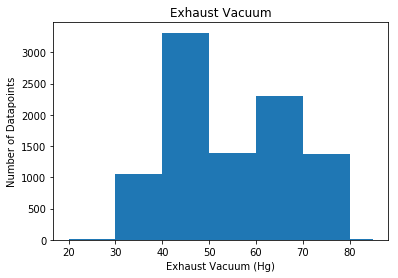

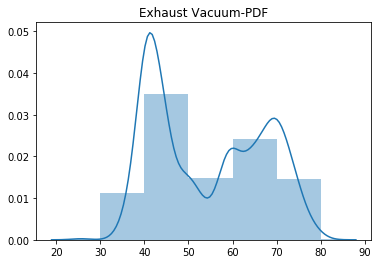

In [28]:
plt.hist(v, bins=[20, 30, 40, 50, 60, 70, 80, 85])
plt.ylabel('Number of Datapoints')
plt.xlabel('Exhaust Vacuum (Hg)')
plt.title('Exhaust Vacuum')
plt.show()

sns.distplot(v, [20, 30, 40, 50, 60, 70, 80, 85])
plt.title('Exhaust Vacuum-PDF')
plt.show()


### Exhaust Vacuum Histogram
In the historgram we can we can deduct the fact that the highest number of values have between 40-50 Hg and that the mean persists between 50-60 Hg

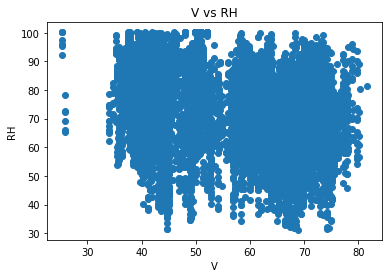

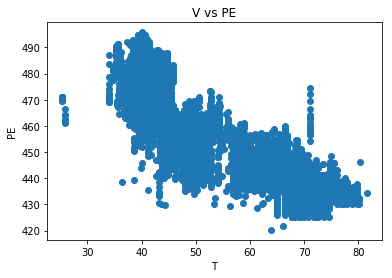

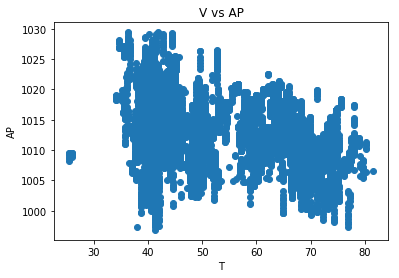

In [29]:
plt.scatter(v, rh)
plt.title('V vs RH')
plt.xlabel('V')
plt.ylabel('RH')
plt.show()

plt.scatter(v, pe)
plt.title('V vs PE')
plt.xlabel('T')
plt.ylabel('PE')
plt.show()

plt.scatter(v, ap)
plt.title('V vs AP')
plt.xlabel('T')
plt.ylabel('AP')
plt.show()

### Summary
1. From the graphs it can inferred that PE has a higher level of correlation that the rest of the variables tested. But by a minute percentage temperature is still has a high correlation therefore, temperature or electrical can be good predictors for Exahust Vacuum.
2. We cannot use both since temperature has a high correlation with eletrical output, therefore in order for the reducdant information to surface we only need to pick either temperature or Eletrical output
3. Similarly we can only use either V or PE to predict T

### Variable 3: Relative Humidity
```Python
array([1024.07, 1020.04, 1012.16, ..., 1012.92, 1013.86, 1017.23])
```
The variable 'Exhaust Vacuum' is a continous variable with a list of floats.

```Python
np.min(dataset[2].values), np.max(dataset[2].values)
```
Exhaust Vacuum ranges from 992.89 Hg to 1033.30 Hg

Note: RH doesn't have a high correlationg with the previous variables 

In [35]:
coef_rh_ap = np.corrcoef(rh, ap)[0][1]
coef_rh_pe = np.corrcoef(rh, pe)[0][1]

print('coef_rh_ap :', coef_rh_ap)
print('coef_rh_pe :', coef_rh_pe)

coef_rh_ap : 0.10617408450964198
coef_rh_pe : 0.3885077111947144


### Summary
We can conclude that Relative humidity (RH) doesn't have much correlation in the dataset. 
We know that RH doesn't correlate well with previous variables either so its not redundant.

### Variable 4: Ambient Pressure
```Python
array([73.17, 59.08, 92.14, ..., 36.48, 62.39, 67.87])
```
The variable 'Ambient Pressure' is a continous variable with a list of floats.

```Python
np.min(dataset[3].values), np.max(dataset[3].values)
```
Exhaust Vacuum ranges from 25.56% to 100.16%

Note: AP doesn't have a high correlation with the previous variables

In [36]:
coef_ap_pe = np.corrcoef(ap, pe)[0][1]

print('coef_ap_pe :', coef_ap_pe)

coef_ap_pe : 0.5215293302095517


### Coefficient Summary
From the coefficient calculations we can find out that the like RH, AP is not very correlating with other variables. AP is also not redundant.

## EDA Summary 
Amongst the 5 variables we find that 3 most correlating variables are PE, V, and T where as AP and RH don't correlate as much as other variables.

* PE and T are the most correlated variables. Followed by V correlates with PE and T almost equally
* AP and RH dont have high correlation with any variables hence they can be considered non redundant for regression/predictions 
* PE, T and V are highly correlated variables. Therefore, if we want to predict either one of those we will have use one of the other 2 to prevent redundancy. 

## Regression

For regression we can use a wide variety of algorithms of different combinations of variables. 
But for this project we will predicting PE and AT and we will be using each other to predict 
each other variable.

Regression types:
1. Polynomial
2. Lasso
3. SVR
4. ElasticNet

In [38]:
# Import Basic Modules for Computation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing for splitting the dataset with 80:20
from sklearn.model_selection import train_test_split

# Import for creating a model/regressor which would predict our outputs
from sklearn.pipeline import Pipeline

#Importing to perform Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Importing to perform Lasso regression 
from sklearn.linear_model import Lasso

# Importing to scale and run SVR
from sklearn.svm import SVR
from sklearn.preprocessing import scale

# Importing to perform ElasticNet regression
from sklearn.linear_model import ElasticNet

# For calculating MAE and MSE for each regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Predicting PE through AT, RH, AP

Polynomial Regression
MSE: 19.521
MAE: 3.504
Lasso Regression
MSE: 22.151
MAE: 3.792
SVR Analysis
MSE: 21.436
MAE: 3.586
ElasticNet Analysis
MSE: 62.071
MAE: 6.589


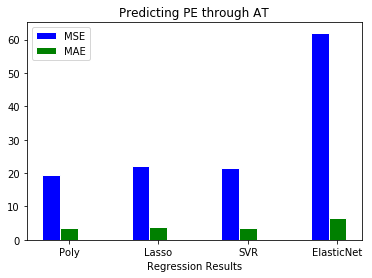

In [43]:
# Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(dataset[['AT', 'RH', 'AP']].values, 
                                                    dataset['PE'].values, 
                                                    test_size=0.20, 
                                                    random_state=42)
mae_bar = []
mse_bar = []
# X_train = X_train.reshape(-1,1)
# X_test = X_test.reshape(-1,1)
# Creating a Polynomial Regression with 3 DOF 
print('Polynomial Regression')
model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
print('MSE: {0:.3f}'.format(mse))
mse_bar.append(mse)
mae = mean_absolute_error(y_true=y_test, y_pred=pred)
mae_bar.append(mae)
print('MAE: {0:.3f}'.format(mae))

# Lasso Regression
print('Lasso Regression')
clf = Lasso(alpha=0.1)
clf = clf.fit(X_train, y_train)
predL = clf.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=predL)
print('MSE: {0:.3f}'.format(mse))
mse_bar.append(mse)
mae = mean_absolute_error(y_true=y_test, y_pred=predL)
print('MAE: {0:.3f}'.format(mae))
mae_bar.append(mae)

print('SVR Analysis')
X_train = scale(X_train)
model = SVR('rbf')
model.fit(X_train, y_train)
X_test = scale(X_test)
predS = model.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=predS)
print('MSE: {0:.3f}'.format(mse))
mse_bar.append(mse)
mae = mean_absolute_error(y_true=y_test, y_pred=predS)
print('MAE: {0:.3f}'.format(mae))
mae_bar.append(mae)

print('ElasticNet Analysis')
from sklearn.linear_model import ElasticNet
model = ElasticNet(random_state=0)
model.fit(X_train, y_train)
predE = model.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=predE)
print('MSE: {0:.3f}'.format(mse))
mse_bar.append(mse)
mae = mean_absolute_error(y_true=y_test, y_pred=predE)
print('MAE: {0:.3f}'.format(mae))
mae_bar.append(mae)

# libraries
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.2

# set height of bar
bars1 = mse_bar
bars2 = mae_bar

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='MSE')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='MAE')

# Add xticks on the middle of the group bars
plt.xlabel('Regression Results')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Poly', 'Lasso', 'SVR', 'ElasticNet'])

# Create legend & Show graphic
plt.title('Predicting PE through AT')
plt.legend()
plt.show()


### Predicting AT through PE, AP, RH

Polynomial Regression
MSE: 3.082
MAE: 1.402
Lasso Regression
MSE: 3.359
MAE: 1.447
SVR Analysis
MSE: 3.331
MAE: 1.436
ElasticNet Analysis
MSE: 9.746
MAE: 2.579


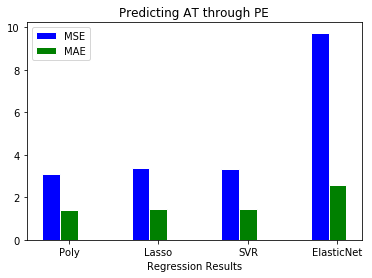

In [44]:
# Training and Test Data
X_train, X_test, y_train, y_test = train_test_split(dataset[['PE','RH','AP']].values, 
                                                    dataset['AT'].values, 
                                                    test_size=0.20, 
                                                    random_state=42)
mae_bar = []
mse_bar = []
# X_train = X_train.reshape(-1,1)
# X_test = X_test.reshape(-1,1)
# Creating a Polynomial Regression with 3 DOF 
print('Polynomial Regression')
model = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=False))])
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=pred)
print('MSE: {0:.3f}'.format(mse))
mse_bar.append(mse)
mae = mean_absolute_error(y_true=y_test, y_pred=pred)
mae_bar.append(mae)
print('MAE: {0:.3f}'.format(mae))

# Lasso Regression
print('Lasso Regression')
clf = Lasso(alpha=0.1)
clf = clf.fit(X_train, y_train)
predL = clf.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=predL)
print('MSE: {0:.3f}'.format(mse))
mse_bar.append(mse)
mae = mean_absolute_error(y_true=y_test, y_pred=predL)
print('MAE: {0:.3f}'.format(mae))
mae_bar.append(mae)

print('SVR Analysis')
X_train = scale(X_train)
model = SVR('rbf')
model.fit(X_train, y_train)
X_test = scale(X_test)
predS = model.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=predS)
print('MSE: {0:.3f}'.format(mse))
mse_bar.append(mse)
mae = mean_absolute_error(y_true=y_test, y_pred=predS)
print('MAE: {0:.3f}'.format(mae))
mae_bar.append(mae)

print('ElasticNet Analysis')
from sklearn.linear_model import ElasticNet
model = ElasticNet(random_state=0)
model.fit(X_train, y_train)
predE = model.predict(X_test)
mse = mean_squared_error(y_true=y_test, y_pred=predE)
print('MSE: {0:.3f}'.format(mse))
mse_bar.append(mse)
mae = mean_absolute_error(y_true=y_test, y_pred=predE)
print('MAE: {0:.3f}'.format(mae))
mae_bar.append(mae)

# libraries
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.2

# set height of bar
bars1 = mse_bar
bars2 = mae_bar

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='MSE')
plt.bar(r2, bars2, color='green', width=barWidth, edgecolor='white', label='MAE')

# Add xticks on the middle of the group bars
plt.xlabel('Regression Results')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Poly', 'Lasso', 'SVR', 'ElasticNet'])

# Create legend & Show graphic
plt.title('Predicting AT through PE')
plt.legend()
plt.show()
